In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df = pd.read_csv('Position_Salaries.csv')

In [5]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  12 non-null     object
 1   Level     12 non-null     int64 
 2   Salary    12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

<AxesSubplot:xlabel='Level', ylabel='Salary'>

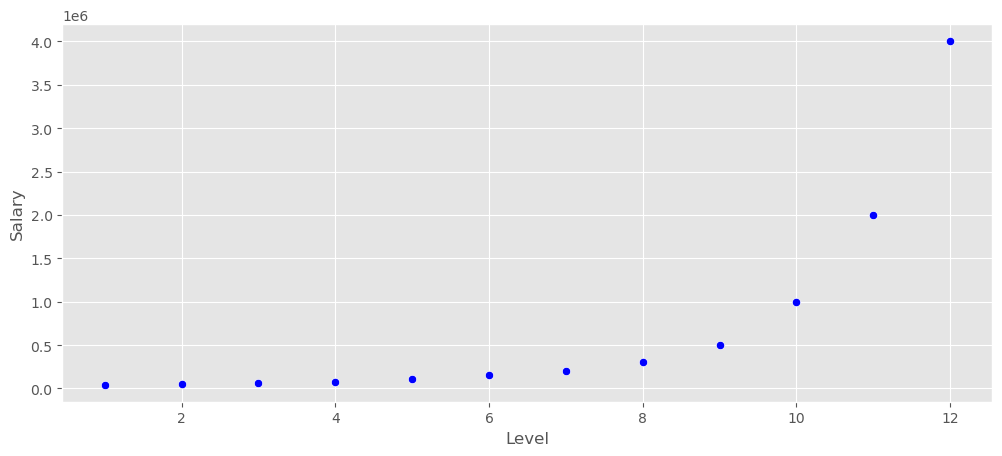

In [10]:
plt.figure(figsize=(12,5),dpi=100)
sns.scatterplot(df['Level'],df['Salary'],color='blue')

In [11]:
X = df[['Level']].values
Y = df[['Salary']].values

In [12]:
X[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [13]:
Y[:5]

array([[ 45000],
       [ 50000],
       [ 60000],
       [ 80000],
       [110000]], dtype=int64)

# - We will use Simple Linear Regression Algorithm to see what will happen...
- **Y' = B0 + B1*X**

In [14]:
from sklearn.linear_model import LinearRegression
Lin_Reg = LinearRegression()
Lin_Reg.fit(X,Y)

LinearRegression()

In [15]:
Lin_Reg.score(X,Y)

0.561357941097376

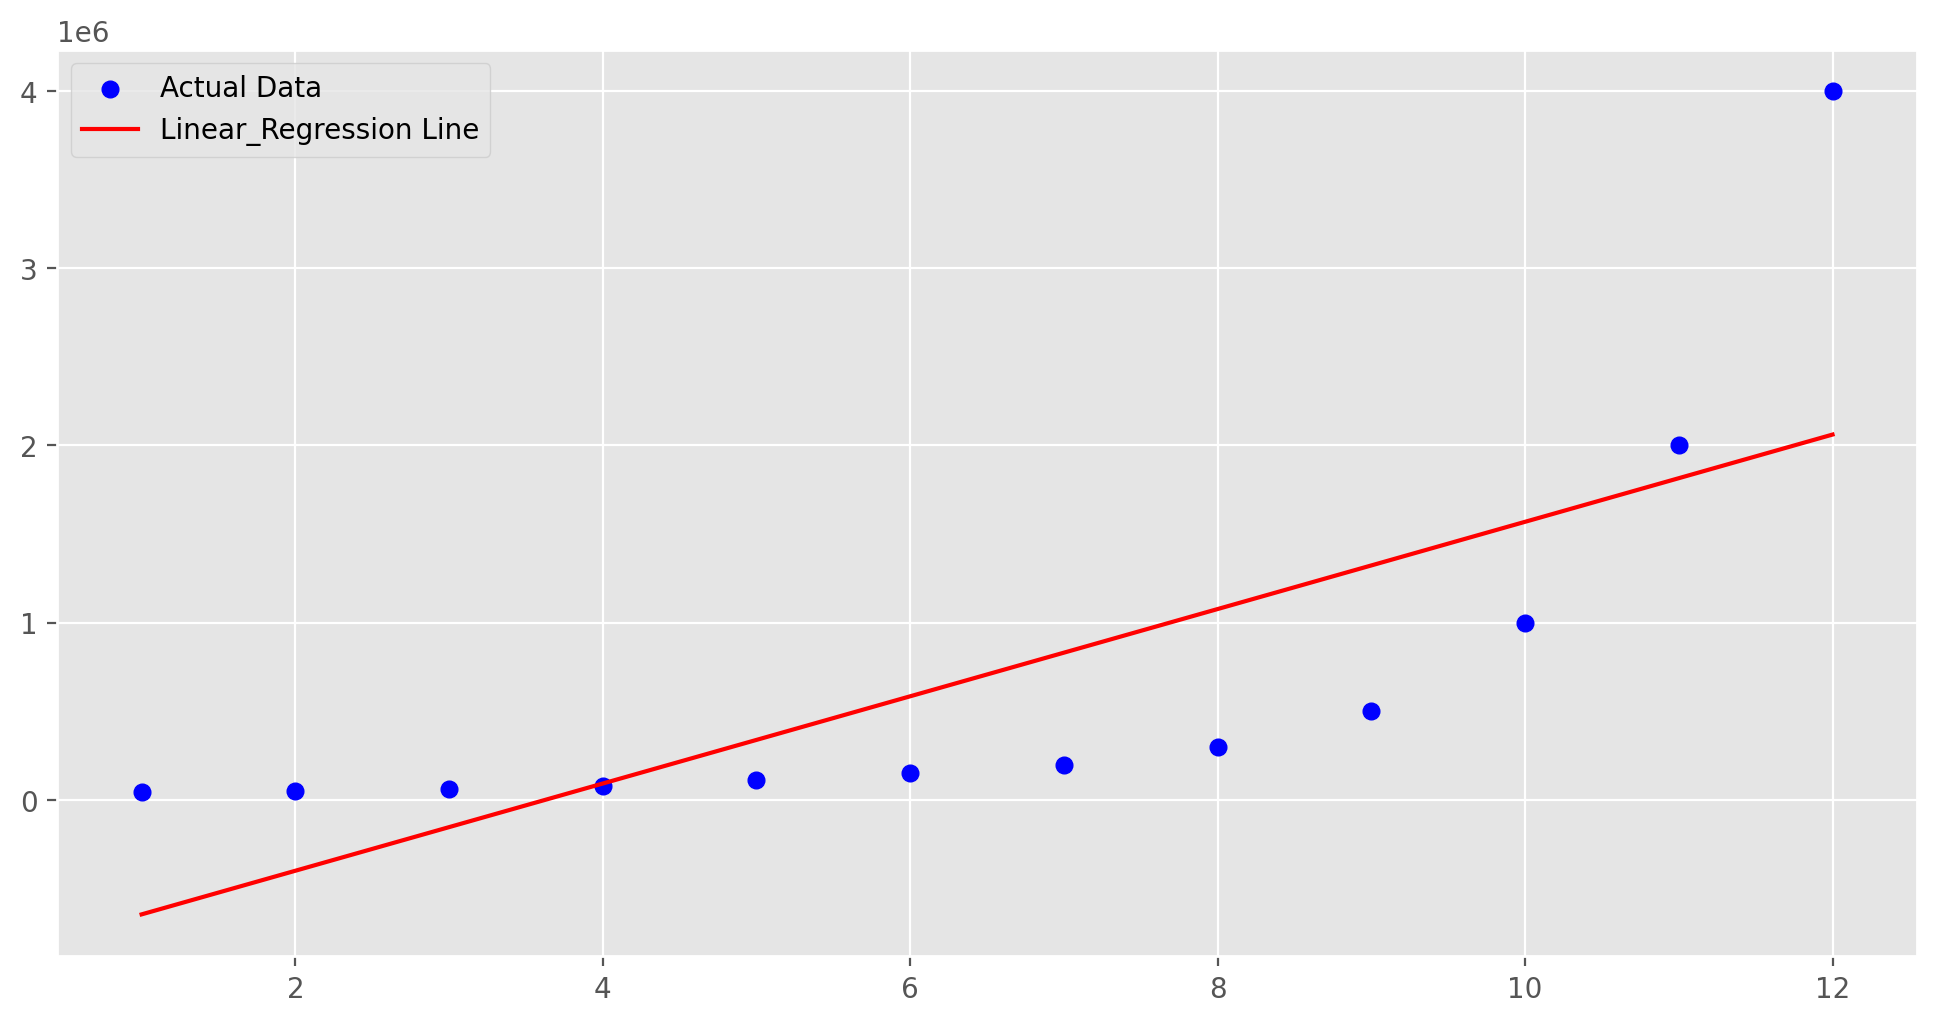

In [16]:
pred_1 = Lin_Reg.predict(X)


plt.figure(figsize = (12,6), dpi = 200)
plt.scatter(X,Y, c = 'b', label = 'Actual Data')
plt.plot(X, pred_1, c = 'r', label = 'Linear_Regression Line')
plt.legend()

# -  Using Polynomial Regression
- Linear Function is not capable of capturing non linear patterns/relationships
- To capture non linear relationships we need to add higher degree variables

Polynomial Regression score for  2 degree is: 0.8744625771933066
Polynomial Regression score for  3 degree is: 0.9775886789767279
Polynomial Regression score for  4 degree is: 0.9981126808735584
Polynomial Regression score for  5 degree is: 0.9999389204081922
Polynomial Regression score for  6 degree is: 0.9999829337129567


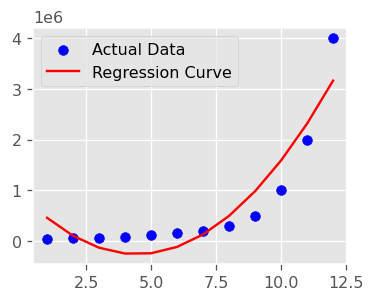

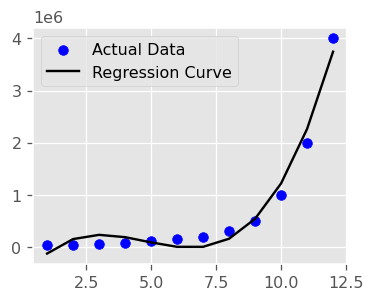

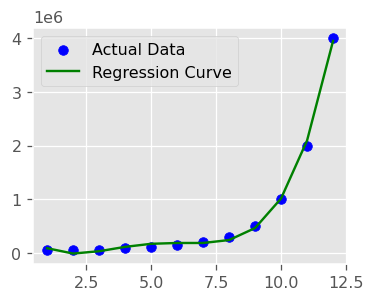

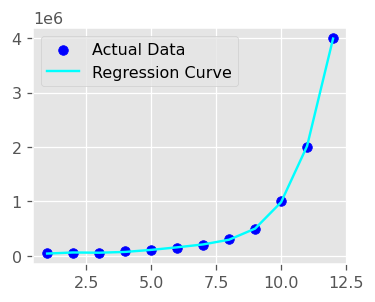

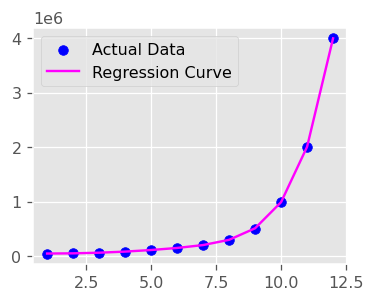

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_Reg = LinearRegression()

for i in range(2,7):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    
    poly_Reg.fit(X_poly,Y)
    print("Polynomial Regression score for ",i,'degree is:',poly_Reg.score(X_poly,Y))
    
    pred = poly_Reg.predict(X_poly)
    
    color = ['red','black','green','cyan','magenta']
    
    plt.figure(figsize = (12,6), dpi = 115)
    plt.subplot(2,3,i-1)
    plt.scatter(X, Y, c = 'b', label = "Actual Data")
    plt.plot(X, pred, c = color[i-2], label = 'Regression Curve')
    plt.legend()
    
        
    